# 3.2 Assignment – Housing EDA 
Analysis with the California Housing Dataset

In [70]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Will aid in making the plots look neat
plt.style.use("ggplot")

I will be loading the dataset using the file path containing my dataset.
I will also print a few rows and run .info() and .describe() so I can get a basic feel for the data types, ranges, and any odd values.

In [73]:
file_path = r"C:\Users\MasterDanteDev86\Downloads\CAP350-O Deep Learning - Online\W1\DPL\data\california-housing.csv"

housing = pd.read_csv(file_path)

housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [75]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [77]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# This is what I noticed while looking through the dataset:

-median_house_value is the target/output column

-All other columns are input features

-Most features are numeric

-ocean_proximity, is categorical

-Some columns have different scales: room counts vs income vs location values

-All seems clean enough to continue.

-ocean_proximity is the only non-numeric column.

-To use in ML models, it will need to be convert into numerical form.

-I will use pandas’ built-in one-hot encoding with get_dummies().

In [81]:
housing_encoded = pd.get_dummies(housing, columns=["ocean_proximity"])

housing_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


# The dataset visually:

-Histogram of median_house_value

-Scatterplot of median_house_value vs median_income

-Scatterplot of Latitude/Longitude colored by house value

-Correlation matrix for numerical features

-The plots will aid in showing distribution shapes, relationships, and trends.

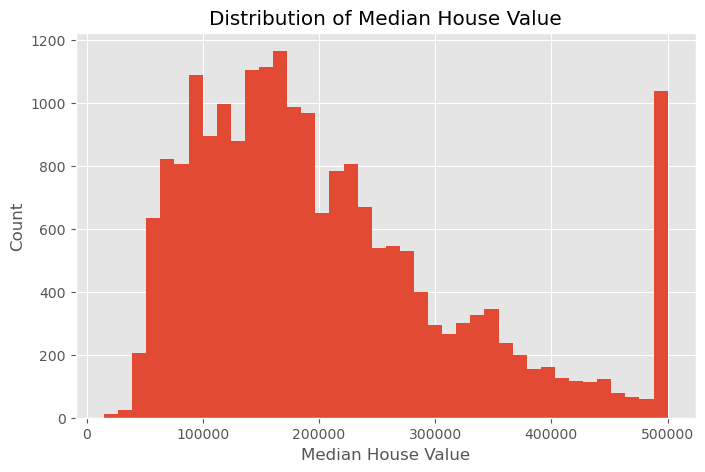

In [84]:
plt.figure(figsize=(8,5))
plt.hist(housing["median_house_value"], bins=40)
plt.xlabel("Median House Value")
plt.ylabel("Count")
plt.title("Distribution of Median House Value")
plt.show()

The distribution leans to the right, which means there are a lot more lower priced homes and only a smaller chunk of very expensive ones. That feels pretty typical for California housing data, since the high end places tend to be rare compared to the cheaper ones spread across the state.

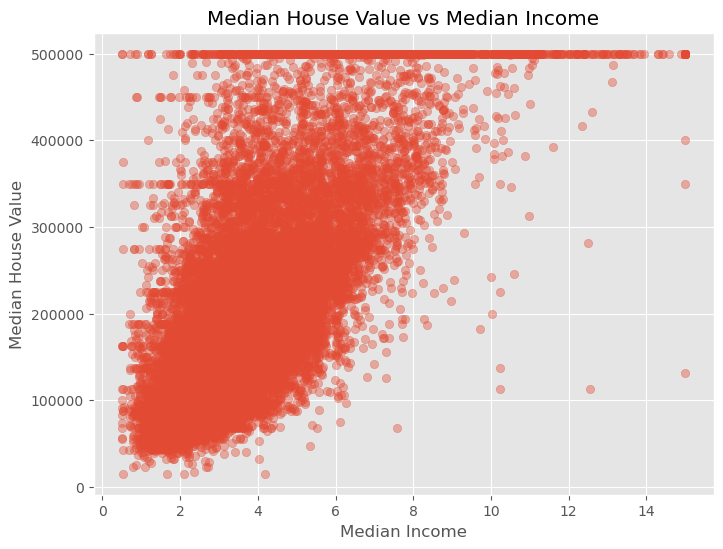

In [87]:
plt.figure(figsize=(8,6))
plt.scatter(housing["median_income"], housing["median_house_value"], alpha=0.4)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Median House Value vs Median Income")
plt.show()

The relationship actually looks strong and fairly linear, as income climbs, the home value tends to rise.

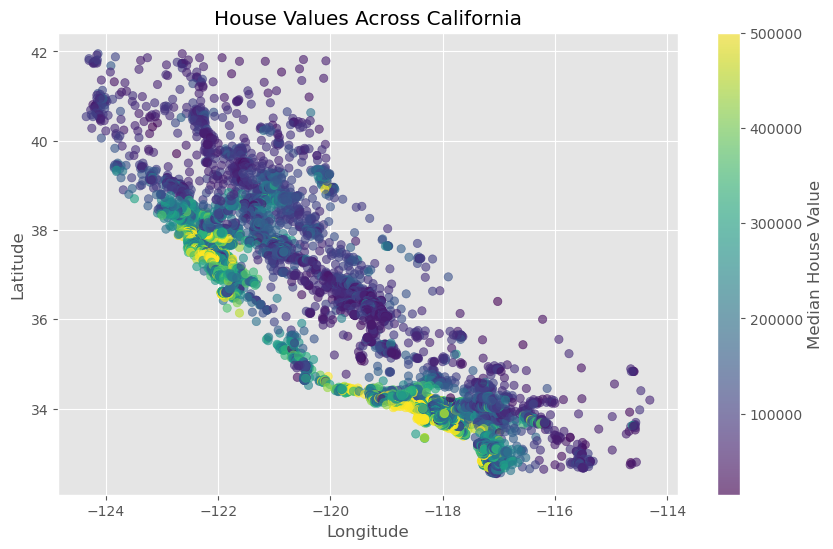

In [90]:
plt.figure(figsize=(10,6))
plt.scatter(housing["longitude"], housing["latitude"],
            c=housing["median_house_value"], cmap="viridis", alpha=0.6)
plt.colorbar(label="Median House Value")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("House Values Across California")
plt.show()

# This is what stands out:

-Coastal areas, especially close to LA and the Bay Area, have noticeably higher prices.

-Inland areas seem much cheaper.

-Location clearly plays a role in housing value.

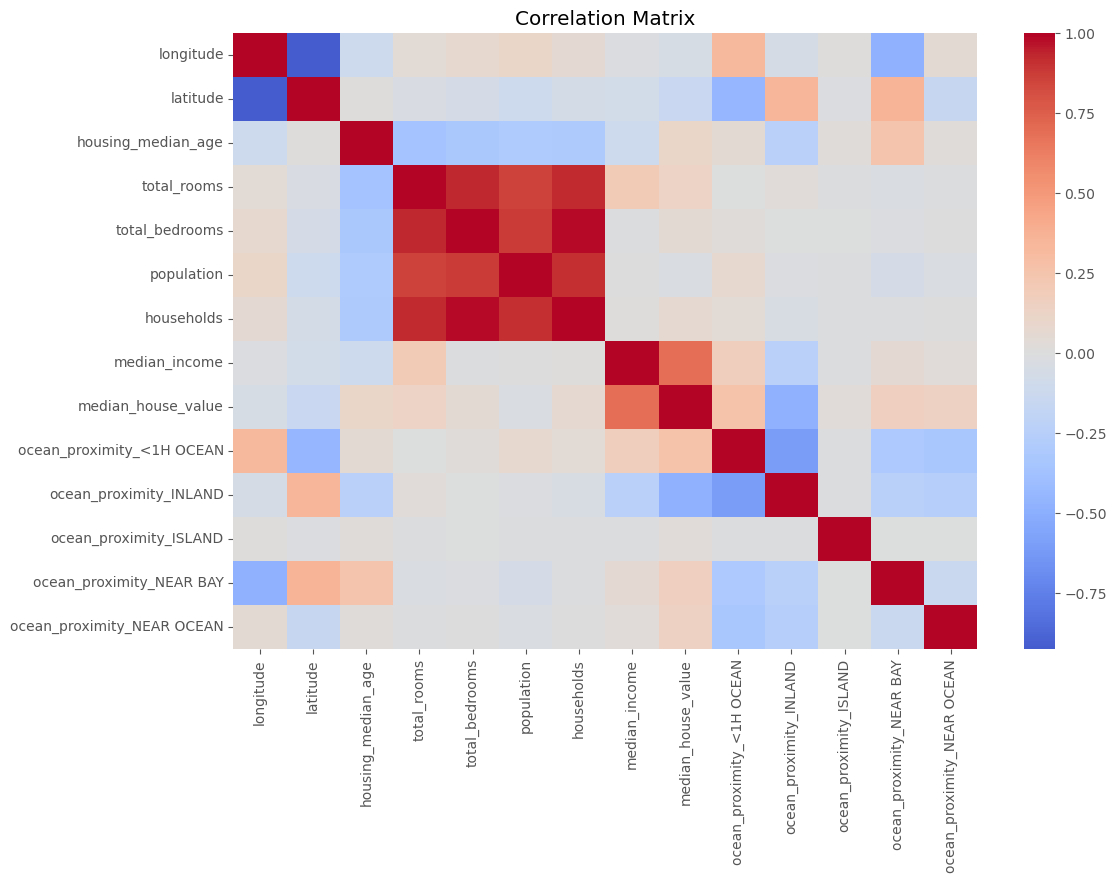

In [93]:
plt.figure(figsize=(12,8))
sns.heatmap(housing_encoded.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

# Observations:

-median_income is the strongest positive correlation with house value.

-Rooms and bedrooms also correlate, but not as strongly as income.

-Some features like total rooms and total bedrooms correlate with each other pretty heavily.

-Latitude and longitude show interesting regional patterns, but they are not (individually) strongly correlated

In [96]:
## Reflection

### 1. Which features appear most strongly related to median house value?
# From the correlation matrix and the scatterplots, median income was the clearest and strongest predictor.
# Higher income neighborhoods almost always had higher home values.
# Latitude and longitude together also mattered when looking at the map plot, especially coastal areas, which were consistently pricier.


### 2. Are any input features highly correlated with each other?
# Yes.
# total_rooms and total_bedrooms.
# households and population.
# This makes sense because bigger areas naturally have more rooms and more people.


### 3. Do you see any nonlinear relationships a simple linear model might struggle with?
# The location patterns, latitude & longitude, clearly have curved or clustered shapes.
# Very high income neighborhoods hit the dataset’s value cap, which flattens the top of the curve.
# Some relationships look strong at first, but then spread out at higher values.
# A plain linear model would miss some of these curves and clusters.


### 4. How well do you expect a linear regression to perform vs an MLP regressor?
# Linear regression will work decently, because income has such a clean linear relationship.
# A MLP should do better overall. It can handle location based patterns and nonlinear combinations of features.
# Since coast vs inland is a huge factor, and linear models can not really curve around geography.